<a href="https://colab.research.google.com/github/MohanZhu0623/Sentiment_Analysis/blob/main/%E2%80%9CCombined_TM_on_Wikipedia_Data_(Preproc%2BSaving%2BViz)_(stable_v2_3_0)%E2%80%9D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%%capture
!pip install contextualized-topic-models

In [3]:
%%capture
!pip install pyldavis

In [4]:
%%capture
!wget https://raw.githubusercontent.com/vinid/data/master/dbpedia_sample_abstract_20k_unprep.txt

In [ ]:
!head -n 2 dbpedia_sample_abstract_20k_unprep.txt

The Mid-Peninsula Highway is a proposed freeway across the Niagara Peninsula in the Canadian province of Ontario. Although plans for a highway connecting Hamilton to Fort Erie south of the Niagara Escarpment have surfaced for decades,it was not until The Niagara Frontier International Gateway Study was published by the Ministry
Monte Zucker (died March 15, 2007) was an American photographer. He specialized in wedding photography, entering it as a profession in 1947. In the 1970s he operated a studio in Silver Spring, Maryland. Later he lived in Florida. He was Brides Magazine's Wedding Photographer of the Year for 1990 and


In [5]:
import pandas as pd
df = pd.read_excel('/content/20000text(WC).xlsx')
text_data = df['text'].tolist()

In [6]:
from contextualized_topic_models.models.ctm import CombinedTM
from contextualized_topic_models.utils.data_preparation import TopicModelDataPreparation
from contextualized_topic_models.utils.preprocessing import WhiteSpacePreprocessingStopwords
import nltk

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [7]:
from nltk.corpus import stopwords as stop_words

nltk.download('stopwords')

documents = [line.strip() for line in text_data]

stopwords = list(stop_words.words("english"))

sp = WhiteSpacePreprocessingStopwords(documents, stopwords_list=stopwords)
preprocessed_documents, unpreprocessed_corpus, vocab, retained_indices = sp.preprocess()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
from contextualized_topic_models.utils.data_preparation import TopicModelDataPreparation

tp = TopicModelDataPreparation("all-mpnet-base-v2")
training_dataset = tp.fit(text_for_contextual=unpreprocessed_corpus, text_for_bow=preprocessed_documents)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Batches:   0%|          | 0/100 [00:00<?, ?it/s]

Let's check the first ten words of the vocabulary

In [9]:
tp.vocab[:10]

array(['ability', 'able', 'abuse', 'access', 'accessible', 'accessories',
       'acclaimed', 'achieve', 'acoustic', 'across'], dtype=object)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


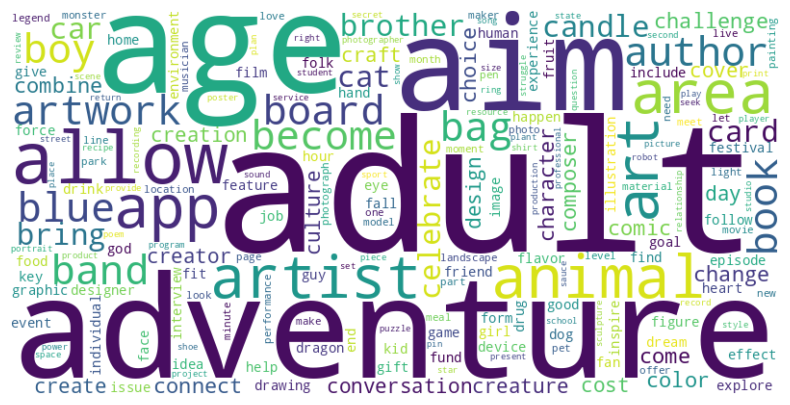

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

words = ' '.join(tp.vocab)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(words)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Training our Combined TM

Finally, we can fit our new topic model. We will ask the model to find 50 topics in our collection.

In [10]:
ctm = CombinedTM(bow_size=len(tp.vocab), contextual_size=768, n_components=20, num_epochs=10)
ctm.fit(training_dataset)   # run the model

0it [00:00, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Epoch: [10/10]	 Seen Samples: [199680/199770]	Train Loss: 63.24966969856849	Time: 0:00:05.435581: : 10it [01:03,  6.34s/it]
100%|██████████| 313/313 [00:04<00:00, 67.54it/s]


# Topics

After training, now it is the time to look at our topics: we can use the

```
get_topic_lists
```

function to get the topics. It also accepts a parameter that allows you to select how many words you want to see for each topic.

If you look at the topics, you will see that they all make sense and are representative of a collection of documents that comes from Wikipedia (general knowledge). Notice that the topics are in English, because we trained the model on English documents.

In [11]:
topic_lists = ctm.get_topic_lists(5)
print(topic_lists)

[['help', 'us', 'show', 'music', 'need'], ['film', 'short', 'comedy', 'feature', 'horror'], ['must', 'stop', 'could', 'never', 'death'], ['community', 'social', 'online', 'platform', 'media'], ['new', 'art', 'artist', 'music', 'project'], ['life', 'world', 'one', 'story', 'love'], ['book', 'comic', 'series', 'fantasy', 'novel'], ['art', 'photography', 'project', 'people', 'artists'], ['album', 'help', 'first', 'need', 'record'], ['game', 'play', 'video', 'mobile', 'app'], ['pins', 'enamel', 'collection', 'series', 'inspired'], ['music', 'new', 'dance', 'album', 'original'], ['cards', 'deck', 'designed', 'hand', 'custom'], ['easy', 'app', 'use', 'way', 'power'], ['made', 'natural', 'quality', 'affordable', 'friendly'], ['help', 'get', 'need', 'us', 'want'], ['portable', 'technology', 'light', 'arduino', 'air'], ['food', 'coffee', 'community', 'truck', 'farm'], ['make', 'create', 'want', 'like', 'unique'], ['women', 'life', 'documentary', 'story', 'young']]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


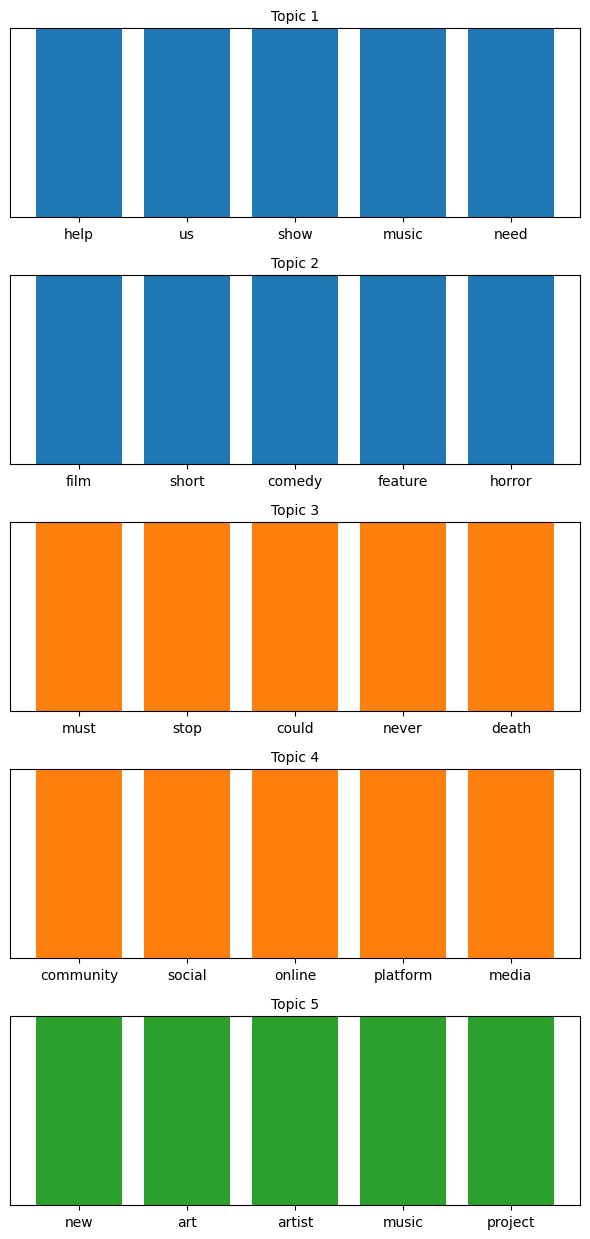

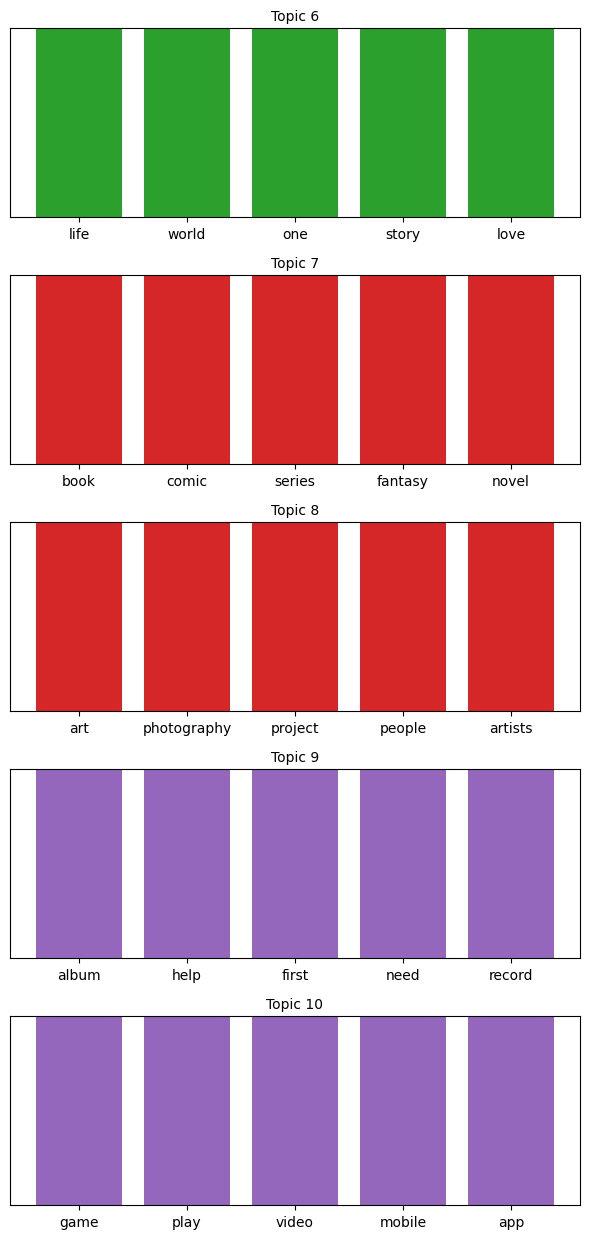

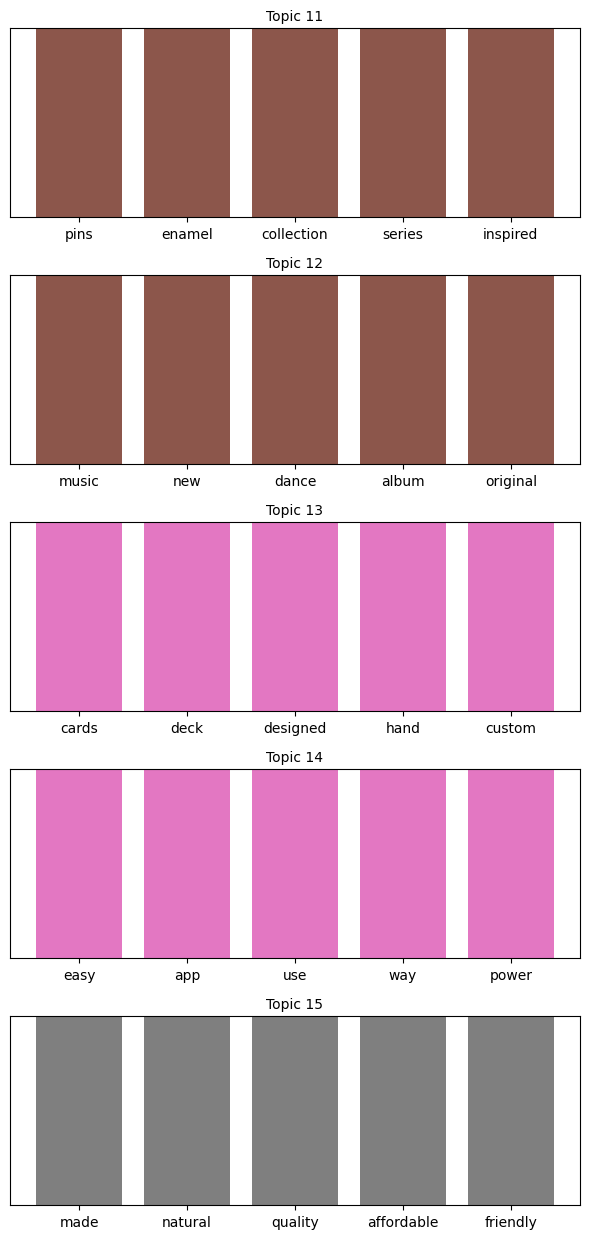

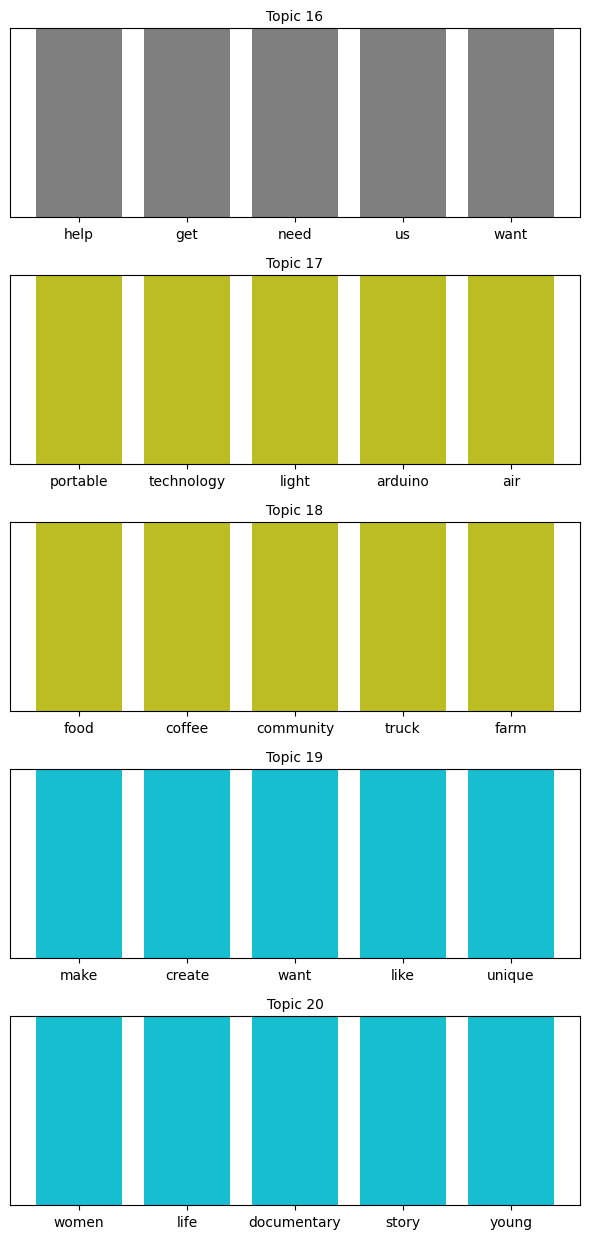

In [20]:
import matplotlib.pyplot as plt

topic_lists = ctm.get_topic_lists(5)

topics_per_plot = 5
num_plots = (len(topic_lists) + topics_per_plot - 1) // topics_per_plot

for j in range(num_plots):
    fig, axes = plt.subplots(topics_per_plot, 1, figsize=(6, topics_per_plot * 2.5), sharey=True)

    for i, ax in enumerate(axes):
        topic_index = j * topics_per_plot + i
        if topic_index < len(topic_lists):
            topic = topic_lists[topic_index]
            words = [word for word in topic]
            frequencies = [1] * len(words)
            ax.bar(words, frequencies, color=plt.cm.tab10(topic_index / len(topic_lists)))
            ax.set_title(f'Topic {topic_index + 1}', fontsize=10)
            ax.set_ylim(0, 1)
            ax.set_yticks([])
            ax.set_ylabel('')

    plt.tight_layout()
    plt.savefig(f'topics_{j + 1}.png')
    plt.show()


In [17]:
 lda_vis_data = ctm.get_ldavis_data_format(tp.vocab, training_dataset, n_samples=10)

100%|██████████| 313/313 [00:04<00:00, 67.40it/s]


In [23]:
import pyLDAvis as vis

lda_vis_data = ctm.get_ldavis_data_format(tp.vocab, training_dataset, n_samples=10)

ctm_pd = vis.prepare(**lda_vis_data)
vis.display(ctm_pd)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
100%|██████████| 313/313 [00:04<00:00, 67.39it/s]


# Topic Predictions

Ok now we can take a document and see which topic has been assigned to it. Results will obviously change with respect to the documents you are using. For example, let's predict the topic of the first preprocessed document that is talking about a peninsula.

In [21]:
topics_predictions = ctm.get_thetas(training_dataset, n_samples=5) # get all the topic predictions

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
  0%|          | 0/313 [00:00<?, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
100%|██████████| 313/313 [00:04<00:00, 65.46it/s]


In [26]:
print(preprocessed_documents[0]) # see the text of our preprocessed document

project designed help protect environment using eco friendly product


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [27]:
import numpy as np
topic_number = np.argmax(topics_predictions[0])  # get the topic id of the first document

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [28]:
topic_number

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


14

In [29]:
ctm.get_topic_lists(5)[15]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['help', 'get', 'need', 'us', 'want']

In [30]:
ctm.get_topic_lists(5)[topic_number] #and the topic should be about natural location/places/related things

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['made', 'natural', 'quality', 'affordable', 'friendly']

In [43]:
# 打印预处理后文档的数量
num_documents = len(preprocessed_documents)
print(f"Number of preprocessed documents: {num_documents}")

Number of preprocessed documents: 19977


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
